In [9]:
import pandas as pd
data = pd.read_csv('blood.csv')
data.head()

,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,99,1
1,0,13,3250,28,1
2,1,17,4000,36,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [10]:
data.describe()

,Recency,Frequency,Monetary,Time,Class
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.516043,1378.676471,34.284759,0.237968
std,8.095396,5.841825,1459.826781,24.380307,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,99.000000,1.000000


In [11]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [12]:
x.shape

(748, 4)

In [13]:
y.shape

(748,)

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [15]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(xtrain, ytrain)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train_resampled)
x_test_scaled = sc.transform(xtest)

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_scaled,y_train_resampled)

LogisticRegression()

In [18]:
ypred = lr.predict(x_test_scaled)
ypred_proba = lr.predict_proba(x_test_scaled)[:, 1]

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
print("Confusion Matrix:")
print(confusion_matrix(ytest, ypred))

Confusion Matrix:
[[71 38]
 [ 7 34]]


In [20]:
print("\nClassification Report:")
print(classification_report(ytest, ypred))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.65      0.76       109
           1       0.47      0.83      0.60        41

    accuracy                           0.70       150
   macro avg       0.69      0.74      0.68       150
weighted avg       0.79      0.70      0.72       150



In [21]:
roc_auc = roc_auc_score(ytest, ypred)
print(f"\nROC-AUC Score: {roc_auc:.2f}")


ROC-AUC Score: 0.74


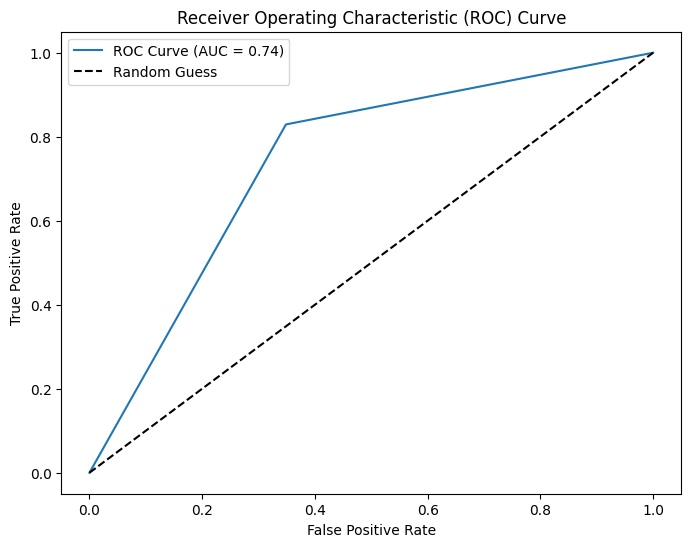

In [22]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(ytest, ypred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [23]:
import pickle
# Save the trained model to a file
with open("logistic_model.pkl", "wb") as model_file:
    pickle.dump(lr, model_file)

# Save the scaler to a file
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(sc, scaler_file)

In [1]:
import streamlit as st
import numpy as np
import pickle

# Load the trained model and scaler
model = pickle.load(open("logistic_model.pkl", "rb"))
scaler = pickle.load(open("scaler.pkl", "rb"))

# App title
st.title("Blood Donation Prediction App")

# User inputs
st.header("Enter Donor Details:")
recency = st.number_input("Recency (months since last donation):", min_value=0.0, step=0.1)
frequency = st.number_input("Frequency (total donations):", min_value=0.0, step=0.1)
monetary = st.number_input("Monetary (total blood donated in c.c.):", min_value=0.0, step=0.1)
time = st.number_input("Time (months since first donation):", min_value=0.0, step=0.1)

# Prediction button
if st.button("Predict"):
    try:
        # Prepare input data
        features = np.array([[recency, frequency, monetary, time]])
        scaled_features = scaler.transform(features)
        
        # Make prediction
        prediction = model.predict(scaled_features)[0]
        probability = model.predict_proba(scaled_features)[0, 1]

        # Display results
        result = "Donor" if prediction == 1 else "Non-Donor"
        st.success(f"Prediction: {result}")
        st.info(f"Probability of being a Donor: {probability:.2f}")
    except Exception as e:
        st.error(f"Error: {e}")


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.1.13:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
